# K-Nearest Neighbors (KNN) - Exemplo Passo a Passo

Neste notebook, veremos como o algoritmo K-Nearest Neighbors funciona. Iremos:
- Gerar um conjunto de dados sintético;
- Treinar um classificador KNN;
- Visualizar a fronteira de decisão;
- Testar a predição em um novo ponto.

Cada etapa será explicada e ilustrada com gráficos.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.colors as colors

# Configurar os gráficos para serem exibidos inline
%matplotlib inline


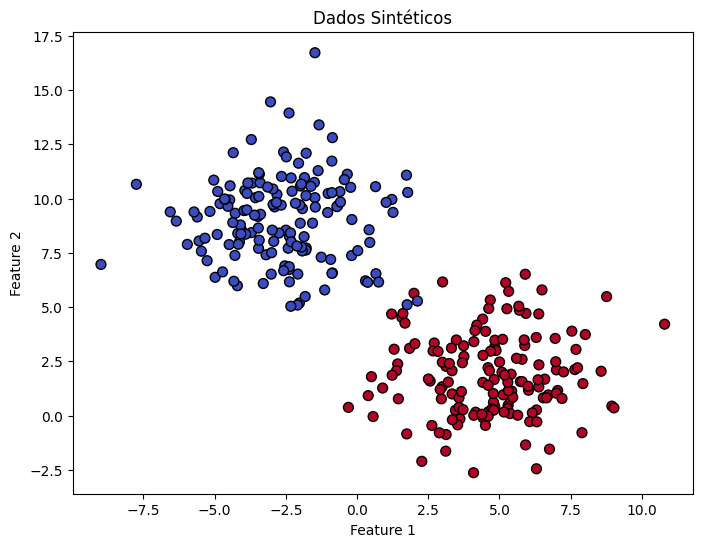

In [5]:
# Gerar dados sintéticos para 2 classes usando make_blobs
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=2.0)

# Plotar os dados
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Dados Sintéticos')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Treinamento do Modelo KNN

Agora vamos treinar um modelo KNN com `k=5` (número de vizinhos) e visualizar a fronteira de decisão gerada pelo modelo.


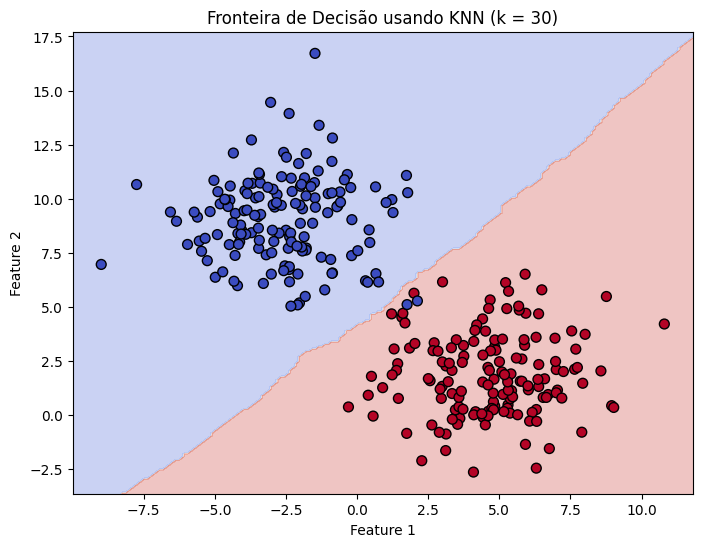

In [8]:
# Definir o número de vizinhos e criar o modelo KNN
k = 30
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Criar uma grade de pontos para plotar a fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Prever as classes para cada ponto da grade
grid = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid)
Z = Z.reshape(xx.shape)

# Plotar a fronteira de decisão junto com os dados originais
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.title(f'Fronteira de Decisão usando KNN (k = {k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Explicação dos Resultados

No gráfico acima, a área colorida representa a fronteira de decisão do modelo KNN.  
Cada região colorida indica a classe prevista para aquela área, com base nos 5 vizinhos mais próximos.  
Assim, podemos visualizar como o KNN classifica novos pontos com base na proximidade aos dados de treinamento.


Novo ponto: [[ 7.5 10. ]]
Classe prevista: 1


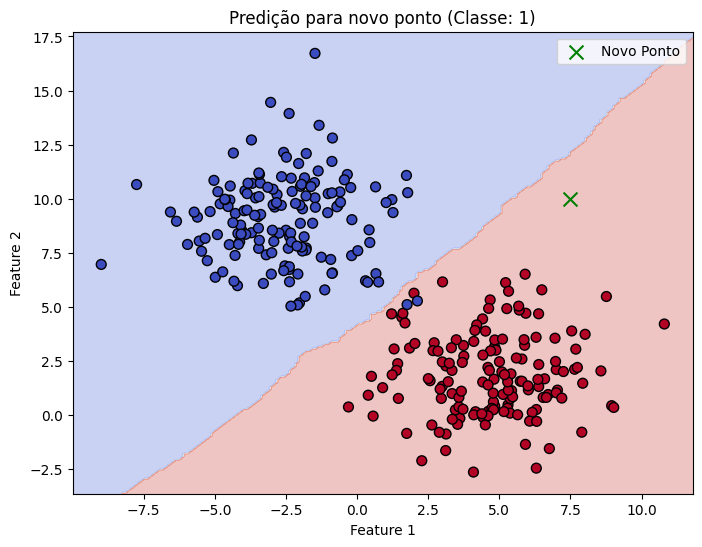

In [11]:
# Definir um novo ponto para teste
novo_ponto = np.array([[7.5, 10]])  # Exemplo de novo ponto
predicao = knn.predict(novo_ponto)
print("Novo ponto:", novo_ponto)
print("Classe prevista:", predicao[0])

# Plotar o novo ponto junto à fronteira de decisão
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.scatter(novo_ponto[0, 0], novo_ponto[0, 1], c='green', s=100, marker='x', label='Novo Ponto')
plt.title(f'Predição para novo ponto (Classe: {predicao[0]})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Conclusão

Neste notebook, demonstramos como:
- Gerar um conjunto de dados sintético,
- Treinar um modelo KNN,
- Visualizar a fronteira de decisão,
- Fazer predições para novos pontos.

Esta é uma forma prática de ensinar os conceitos por trás do KNN, mostrando a influência dos vizinhos na classificação.
